In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sb
plt.style.use('fast')
from sklearn.metrics import log_loss
import math
plt.rcParams['figure.figsize'] = [10, 6]

In [10]:
plt.rc('font', size=22) #controls default text size
plt.rc('axes', titlesize=22) #fontsize of the title
plt.rc('axes', labelsize=22) #fontsize of the x and y labels
plt.rc('xtick', labelsize=22) #fontsize of the x tick labels
plt.rc('ytick', labelsize=22) #fontsize of the y tick labels
plt.rc('legend', fontsize=22) #fontsize of the legend

In [2]:
data = pd.read_csv('extracted_features.csv')

In [5]:
data = data.drop(['tourney_id','tourney_name'
                 ,'tourney_date','winner_id','winner_name'
                 ,'loser_id','loser_name',
                 'score',
                 'w_ace','w_df','w_svpt','w_1stIn','w_1stWon','w_SvGms','w_bpSaved','w_bpFaced','w_2ndWon','l_2ndWon',
                 'l_ace','l_df','l_svpt','l_1stIn','l_1stWon','l_SvGms','l_bpSaved','l_bpFaced','index'],axis=1)

# Simple models

## test on whole dataset 

In [6]:
len(data[data['winner_rank']<data['loser_rank']])/len(data)

0.6521155287982722

In [6]:
rank_yearly = []
for year in range(1992, 2024):
    rank_yearly.append(100*len(data[(data['winner_rank']<data['loser_rank']) & (data['year']==year)])/len(data[data['year']==year]))

In [10]:
len(data[data['winner_elo']>data['loser_elo']])/len(data)

0.6578785403354857

In [7]:
elo_yearly = []
for year in range(1992, 2024):
    elo_yearly.append(100*len(data[(data['winner_elo']>data['loser_elo']) & (data['year']==year)])/len(data[data['year']==year]))

In [7]:
len(data[data['winner_glicko']>data['loser_glicko']])/len(data)

0.6626008527019013

In [8]:
glicko_yearly = []
for year in range(1992, 2024):
    glicko_yearly.append(100*len(data[(data['winner_glicko']>data['loser_glicko']) & (data['year']==year)])/len(data[data['year']==year]))

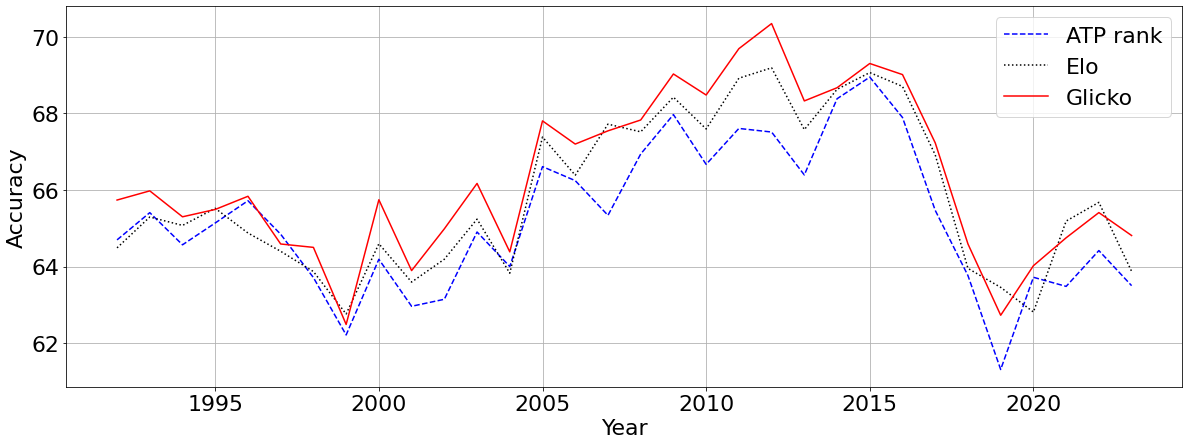

In [31]:
plt.plot(range(1992, 2024),rank_yearly,label='ATP rank',color='blue',ls='--')
plt.plot(range(1992, 2024),elo_yearly,label='Elo',color='black',ls=':')
plt.plot(range(1992, 2024),glicko_yearly,label='Glicko',color='red')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Year')
plt.grid()
plt.savefig(r'img\\Models\\simple_models_compare.pdf')

## Whole dataset with grand slam/other split

In [16]:
rank_yearly_gs = []
rank_yearly_ot = []
for year in range(1992, 2024):
    rank_yearly_gs.append(100*len(data[(data['winner_rank']<data['loser_rank']) & (data['year']==year) & (data['tourney_level']=='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']=='Grand Slam')]))
    rank_yearly_ot.append(100*len(data[(data['winner_rank']<data['loser_rank']) & (data['year']==year) & (data['tourney_level']!='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']!='Grand Slam')]))

In [17]:
elo_yearly_gs = []
elo_yearly_ot = []
for year in range(1992, 2024):
    elo_yearly_gs.append(100*len(data[(data['winner_elo']>data['loser_elo']) & (data['year']==year) & (data['tourney_level']=='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']=='Grand Slam')]))
    elo_yearly_ot.append(100*len(data[(data['winner_elo']>data['loser_elo']) & (data['year']==year) & (data['tourney_level']!='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']!='Grand Slam')]))

In [18]:
glicko_yearly_gs = []
glicko_yearly_ot = []
for year in range(1992, 2024):
    glicko_yearly_gs.append(100*len(data[(data['winner_glicko']>data['loser_glicko']) & (data['year']==year) & (data['tourney_level']=='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']=='Grand Slam')]))
    glicko_yearly_ot.append(100*len(data[(data['winner_glicko']>data['loser_glicko']) & (data['year']==year) & (data['tourney_level']!='Grand Slam')])/len(data[(data['year']==year) & (data['tourney_level']!='Grand Slam')]))

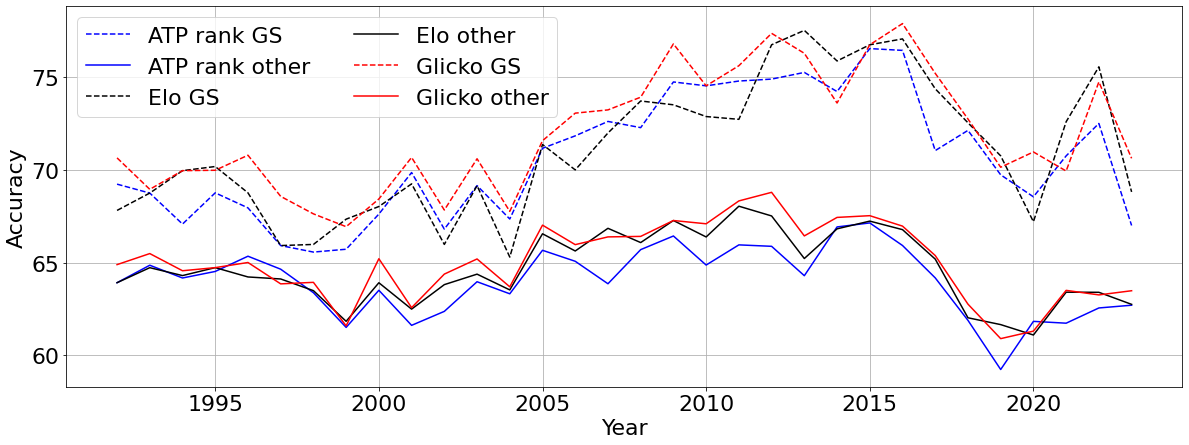

In [35]:
plt.plot(range(1992, 2024),rank_yearly_gs,label='ATP rank GS',color='blue',ls='--')
plt.plot(range(1992, 2024),rank_yearly_ot,label='ATP rank other',color='blue')
plt.plot(range(1992, 2024),elo_yearly_gs,label='Elo GS',color='black',ls='--')
plt.plot(range(1992, 2024),elo_yearly_ot,label='Elo other',color='black')
plt.plot(range(1992, 2024),glicko_yearly_gs,label='Glicko GS',color='red',ls='--')
plt.plot(range(1992, 2024),glicko_yearly_ot,label='Glicko other',color='red')
plt.legend(ncol = 2)

plt.ylabel('Accuracy')
plt.xlabel('Year')
plt.grid()
plt.savefig(r'img\\Models\\simple_models_compare_split.pdf')

## matches from 2017 (about 80/20 split)

In [20]:
#accuracy
len(data[(data['winner_rank']<data['loser_rank']) & (data['year']>=2017)])/len(data[data['year']>=2017])

0.6367579773010874

In [21]:
len(data[(data['winner_elo']>data['loser_elo']) & (data['year']>=2017)])/len(data[data['year']>=2017])

0.646800166379464

In [22]:
len(data[(data['winner_glicko']>data['loser_glicko']) & (data['year']>=2017)])/len(data[data['year']>=2017])

0.6485828034939688

In [21]:
# calculating log loss
test = data[data['year']>=2017][['proba_elo', 'winner_elo','loser_elo,''winner_glicko', 'loser_glicko', 'winner_RD', 'loser_RD']]
test['label']=1
test['g'] = 1/(1+3*(math.log(10)/400)**2*test['winner_RD']**2/math.pi**2)**(1/2)
test['proba_glicko'] = 1/(1+10**(-test['g']*(test['winner_glicko']-test['loser_glicko'])/400))
s = test.sample(8414)
s['proba_elo']=1-s['proba_elo']
s['proba_glicko']=1-s['proba_glicko']
s['label']=0
test.update(s)

In [22]:
log_loss(test['label'],test['proba_elo'])

0.642098115743873

In [23]:
log_loss(test['label'],test['proba_glicko'])

0.6323616830821893

## Empirical winning probability

In [25]:
data_test = data[['winner_glicko', 'loser_glicko','winner_elo', 'loser_elo','winner_rank', 'loser_rank']]
data_test['diff_glicko'] = abs(data_test['winner_glicko'] - data_test['loser_glicko'])
data_test['diff_elo'] = abs(data_test['winner_elo'] - data_test['loser_elo'])
data_test['diff_rank'] = abs(data_test['winner_rank'] - data_test['loser_rank'])

C:\Users\krych\AppData\Local\Temp\ipykernel_13960\247440849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['diff_glicko'] = abs(data_test['winner_glicko'] - data_test['loser_glicko'])
C:\Users\krych\AppData\Local\Temp\ipykernel_13960\247440849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['diff_elo'] = abs(data_test['winner_elo'] - data_test['loser_elo'])
C:\Users\krych\AppData\Local\Temp\ipykernel_13960\247440849.py:4: SettingWithCopyWarning: 
A value is trying to be set on a

In [26]:
idx = np.linspace(0,1000,100)
ps_glicko = []
for i in range(1,len(idx)):
    a = data_test[(data_test['diff_glicko']>idx[i-1]) & (data_test['diff_glicko']<idx[i])]
    b = a[a['winner_glicko']>a['loser_glicko']]
    ps_glicko.append(len(b)/len(a))

In [27]:
ps_elo = []
for i in range(1,len(idx)):
    a = data_test[(data_test['diff_elo']>idx[i-1]) & (data_test['diff_elo']<idx[i])]
    b = a[a['winner_elo']>a['loser_elo']]
    ps_elo.append(len(b)/len(a))

In [28]:
idx = np.linspace(0,1300,100)
ps_rank = []
for i in range(1,len(idx)):
    a = data_test[(data_test['diff_rank']>idx[i-1]) & (data_test['diff_rank']<idx[i])]
    b = a[a['winner_rank']<a['loser_rank']]
    ps_rank.append(len(b)/len(a))

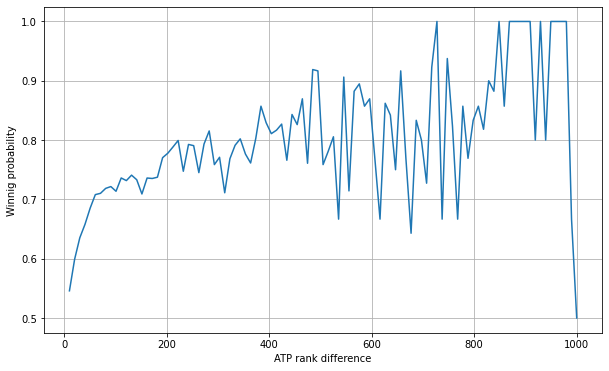

In [33]:
plt.plot(np.linspace(0,1000,100)[1:],ps_rank)
plt.xlabel('ATP rank difference')
plt.ylabel('Winnig probability')
plt.grid()
plt.savefig(r'img\\Models\\winnig_proba_rank.pdf')

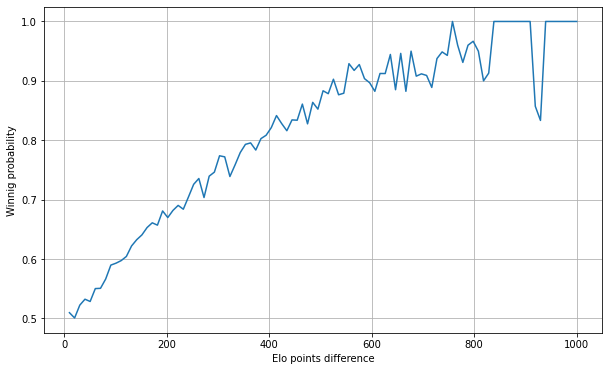

In [34]:
plt.plot(np.linspace(0,1000,100)[1:],ps_elo)
plt.xlabel('Elo points difference')
plt.ylabel('Winnig probability')
plt.grid()
plt.savefig(r'img\\Models\\winnig_proba_elo.pdf')

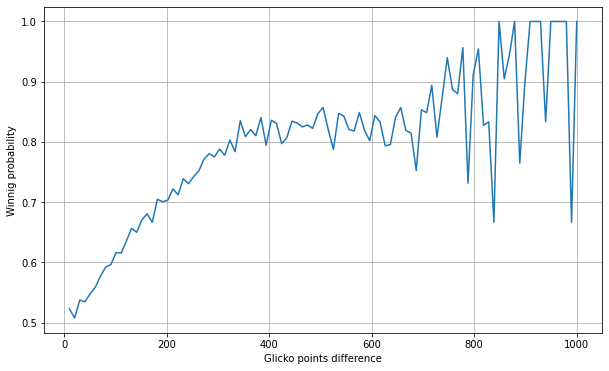

In [35]:
plt.plot(np.linspace(0,1000,100)[1:],ps_glicko)
plt.xlabel('Glicko points difference')
plt.ylabel('Winnig probability')
plt.grid()
plt.savefig(r'img\\Models\\winnig_proba_glicko.pdf')

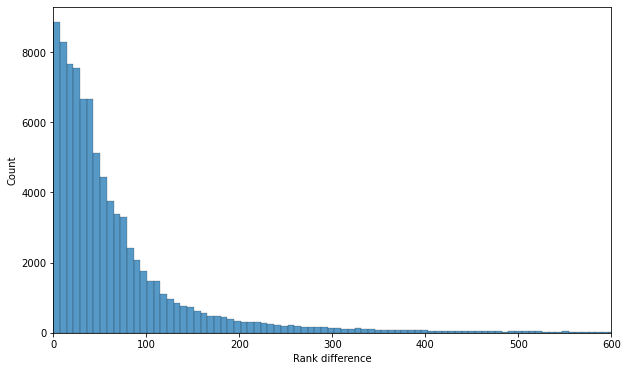

In [145]:
sb.histplot(data_test['diff_rank'],bins=300)
plt.xlim([0,600])
plt.xlabel('Rank difference')
plt.ylabel("Count")
plt.savefig(r'img\\Models\\Rank_diff.pdf')

In [49]:
test = data[['proba_elo', 'winner_elo','loser_elo','winner_glicko', 'loser_glicko', 'winner_RD', 'loser_RD']]
test['g'] = 1/(1+3*(math.log(10)/400)**2*test['winner_RD']**2/math.pi**2)**(1/2)
test['proba_glicko'] = 1/(1+10**(-test['g']*(test['winner_glicko']-test['loser_glicko'])/400))
test['label']=1
s = test.sample(44681)
s['proba_elo']=1-s['proba_elo']
s['proba_glicko']=1-s['proba_glicko']
s['label']=0
test.update(s)

C:\Users\krych\AppData\Local\Temp\ipykernel_1972\3125531769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['g'] = 1/(1+3*(math.log(10)/400)**2*test['winner_RD']**2/math.pi**2)**(1/2)
C:\Users\krych\AppData\Local\Temp\ipykernel_1972\3125531769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['proba_glicko'] = 1/(1+10**(-test['g']*(test['winner_glicko']-test['loser_glicko'])/400))
C:\Users\krych\AppData\Local\Temp\ipykernel_1972\3125531769.py:4: SettingWithCopyWarning: 
A value is trying to 

In [50]:
idx = np.linspace(0,1,25)
ps_elo = []
mean_elo = []
for i in range(1,len(idx)):
    a = test[(test['proba_elo']>idx[i-1]) & (test['proba_elo']<idx[i])]
    b = a[a['label']==1]
    ps_elo.append(len(b)/len(a))
    mean_elo.append(a['proba_elo'].mean())

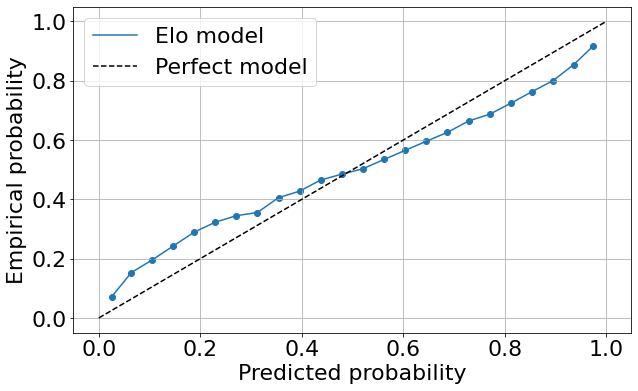

In [51]:
plt.plot(mean_elo,ps_elo,label='Elo model')
plt.scatter(mean_elo,ps_elo)
plt.plot([0,1],[0,1],ls='--',color='black',label='Perfect model')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.legend()
plt.savefig(r'img\\Models\\calibration_curve_elo.pdf')

In [52]:
idx = np.linspace(0,1,25)
ps_glicko = []
mean_glicko = []
for i in range(1,len(idx)):
    a = test[(test['proba_glicko']>idx[i-1]) & (test['proba_glicko']<idx[i])]
    b = a[a['label']==1]
    ps_glicko.append(len(b)/len(a))
    mean_glicko.append(a['proba_glicko'].mean())

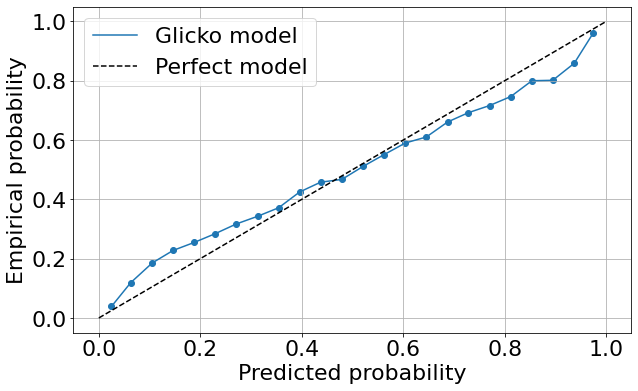

In [53]:
plt.plot(mean_glicko,ps_glicko,label='Glicko model')
plt.scatter(mean_glicko,ps_glicko)
plt.plot([0,1],[0,1],ls='--',color='black',label='Perfect model')
plt.xlabel('Predicted probability')
plt.ylabel('Empirical probability')
plt.grid()
plt.legend()
plt.savefig(r'img\\Models\\calibration_curve_glicko.pdf')